# Air Quality Index Predictor


### Importing Libraries:

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv("AQI Data.csv")

In [3]:
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


### Let us understand what these abbreviations stand for :

- T	 = Average annual temperature
- TM = Annual average maximum temperature
- Tm = Average annual minimum temperature
- SLP = Sea Level Pressure
- H = Humidity
- VV = Visibility
- V	= Annual average wind speed
- VM = Maximum wind speed
- PM 2.5 : This is our Dependent variable i.e. our Air Quality Index

## Data Exploration

### Checking Null Values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093 entries, 0 to 1092
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       1093 non-null   float64
 1   TM      1093 non-null   float64
 2   Tm      1093 non-null   float64
 3   SLP     1093 non-null   float64
 4   H       1093 non-null   float64
 5   VV      1093 non-null   float64
 6   V       1093 non-null   float64
 7   VM      1093 non-null   float64
 8   PM 2.5  1092 non-null   float64
dtypes: float64(9)
memory usage: 77.0 KB


In [5]:
df.isnull().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    1
dtype: int64

In [6]:
df=df.dropna()

In [7]:
df.isnull().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    0
dtype: int64

In [8]:
df.nunique()

T         243
TM        238
Tm        223
SLP       253
H          76
VV         22
V          94
VM         27
PM 2.5    555
dtype: int64

In [9]:
print(df.dtypes)
print("Shape :",df.shape)

T         float64
TM        float64
Tm        float64
SLP       float64
H         float64
VV        float64
V         float64
VM        float64
PM 2.5    float64
dtype: object
Shape : (1092, 9)


<b> All are continuous variables. </b>

In [10]:
df.describe()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
count,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000
mean,26.019963,32.494414,19.468040,1008.070513,62.892857,2.003480,6.753297,15.809432,109.090984
std,7.232026,6.670017,7.437543,7.523290,15.693982,0.747784,3.842442,7.310394,84.465790
min,6.700000,9.800000,0.000000,991.500000,20.000000,0.300000,0.400000,1.900000,0.000000
25%,19.300000,27.800000,12.100000,1001.100000,54.000000,1.600000,3.700000,11.100000,41.833333
50%,28.200000,34.250000,21.200000,1008.050000,64.000000,1.900000,6.500000,14.800000,83.458333
75%,31.700000,37.000000,26.000000,1015.000000,74.000000,2.600000,9.100000,18.300000,158.291667
max,38.500000,45.500000,32.700000,1023.200000,98.000000,5.800000,24.400000,57.600000,404.500000


<Axes: xlabel='PM 2.5', ylabel='Density'>

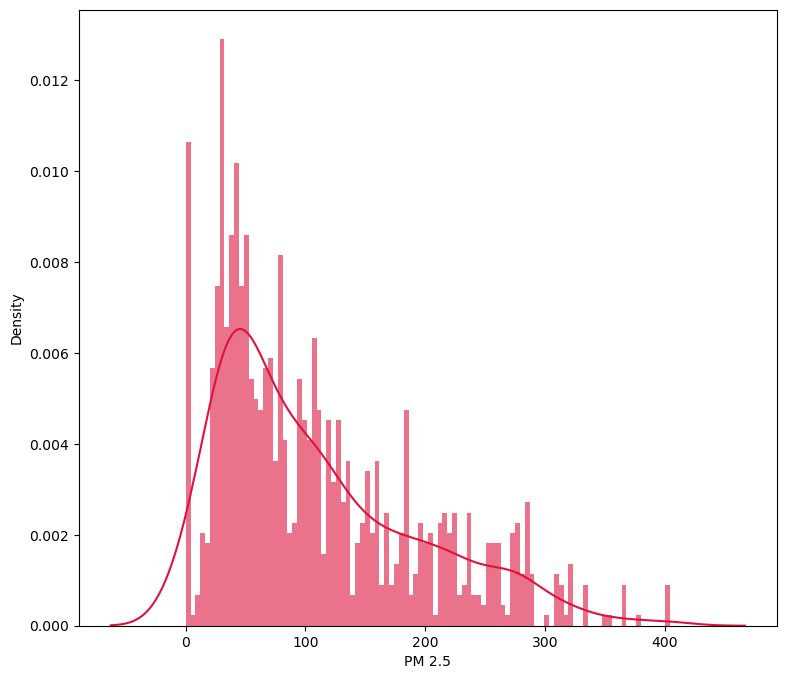

In [15]:
plt.figure(figsize=(9, 8))
sns.distplot(df['PM 2.5'], color='crimson', bins=100, hist_kws={'alpha': 0.6})

<b> An AQI value of 50 or below represents good air quality, while an AQI value over 300 represents hazardous air quality.</b>

In [16]:
col= df.columns
col

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')

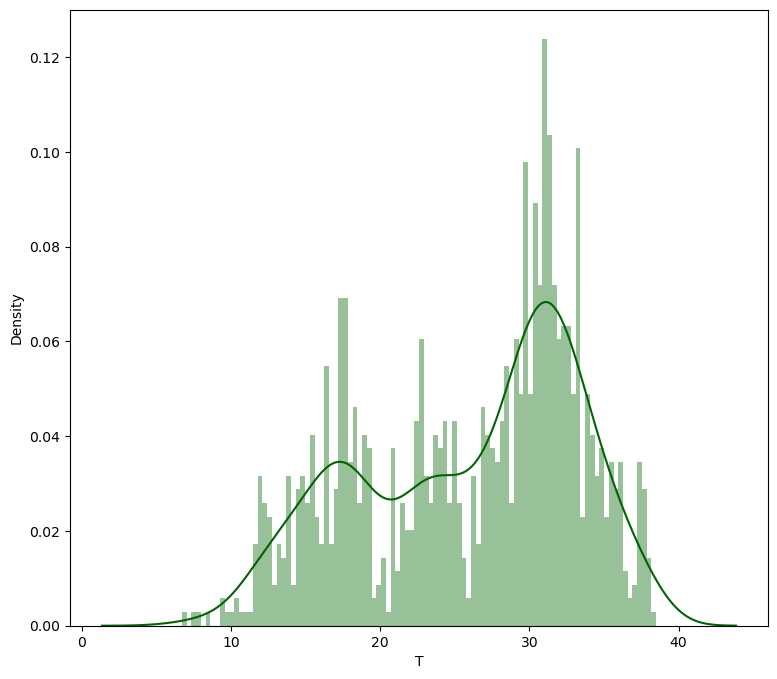

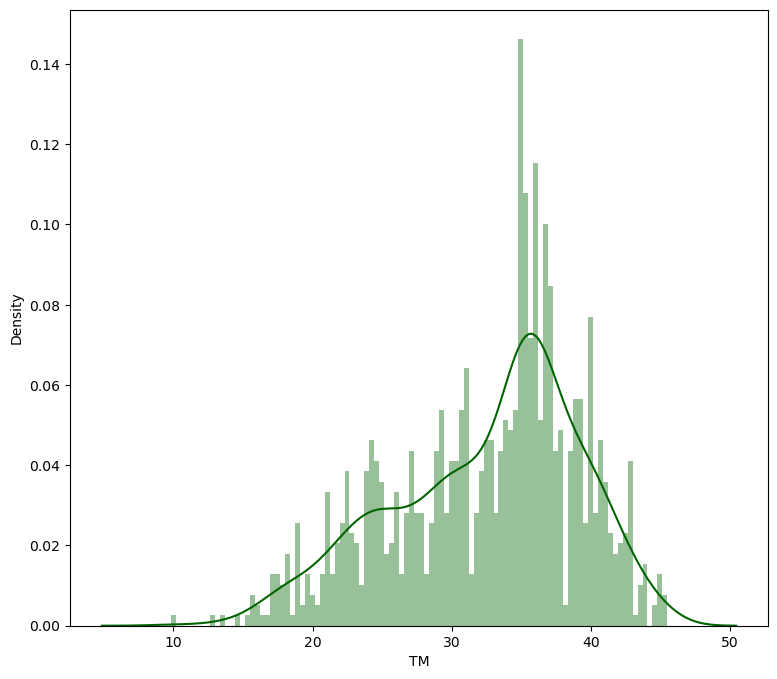

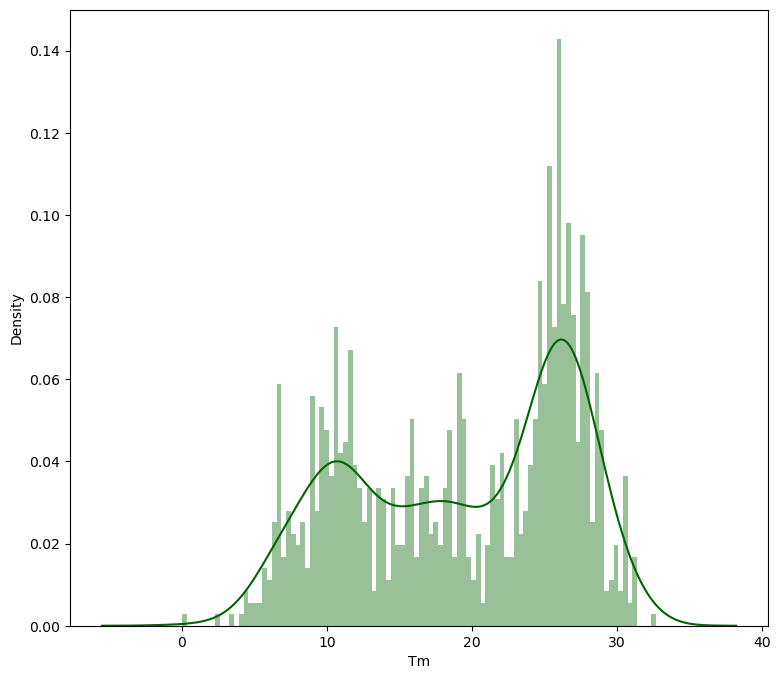

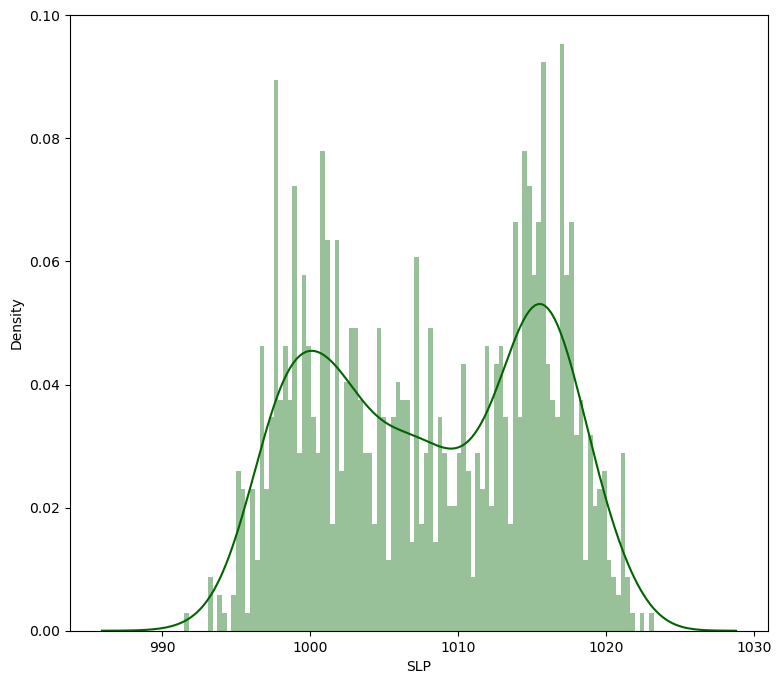

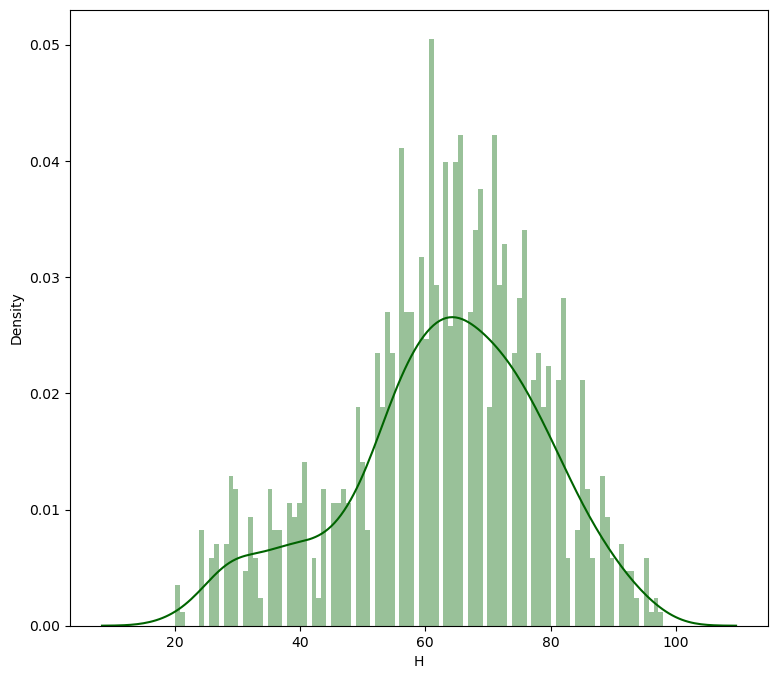

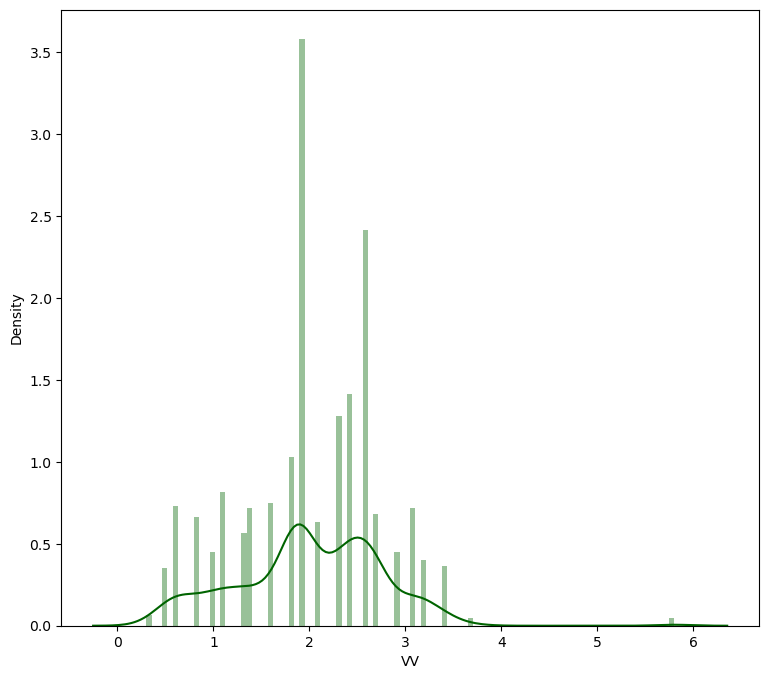

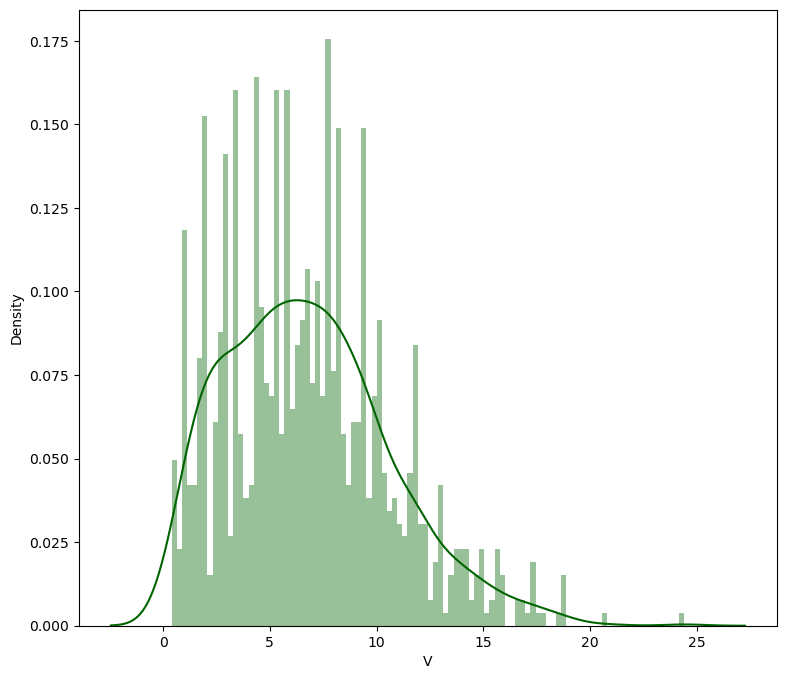

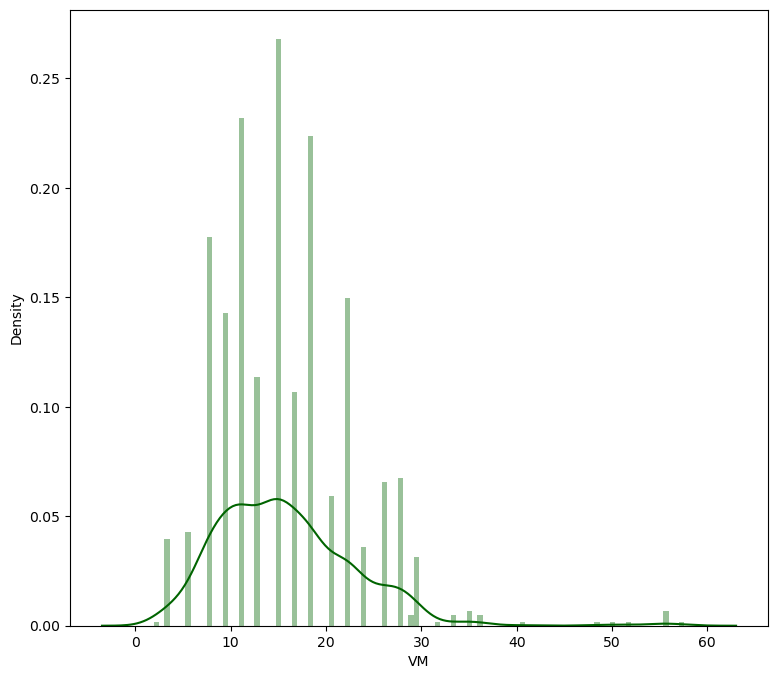

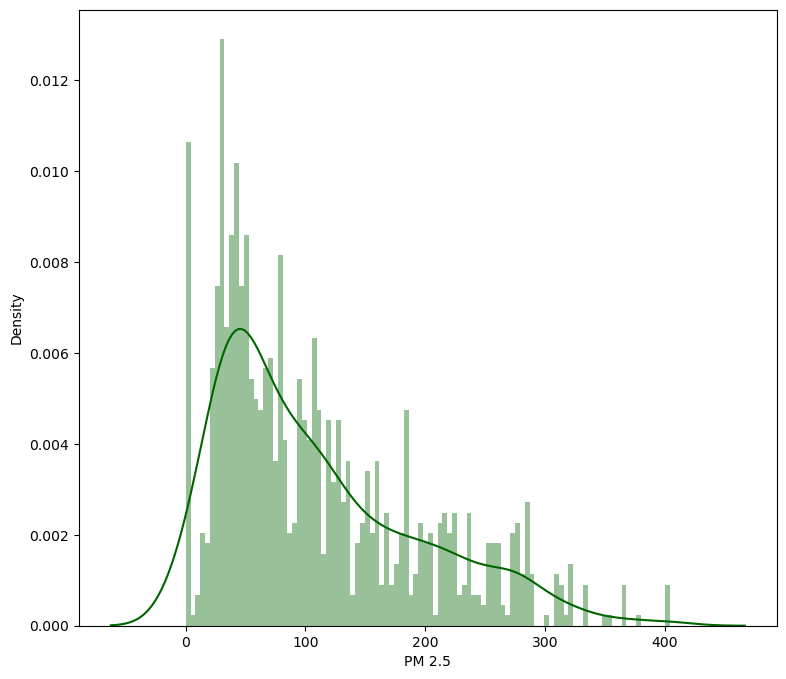

In [18]:
for i in col:
    plt.figure(figsize=(9, 8))
    sns.distplot(df[i], color='darkgreen', bins=100, hist_kws={'alpha': 0.4})

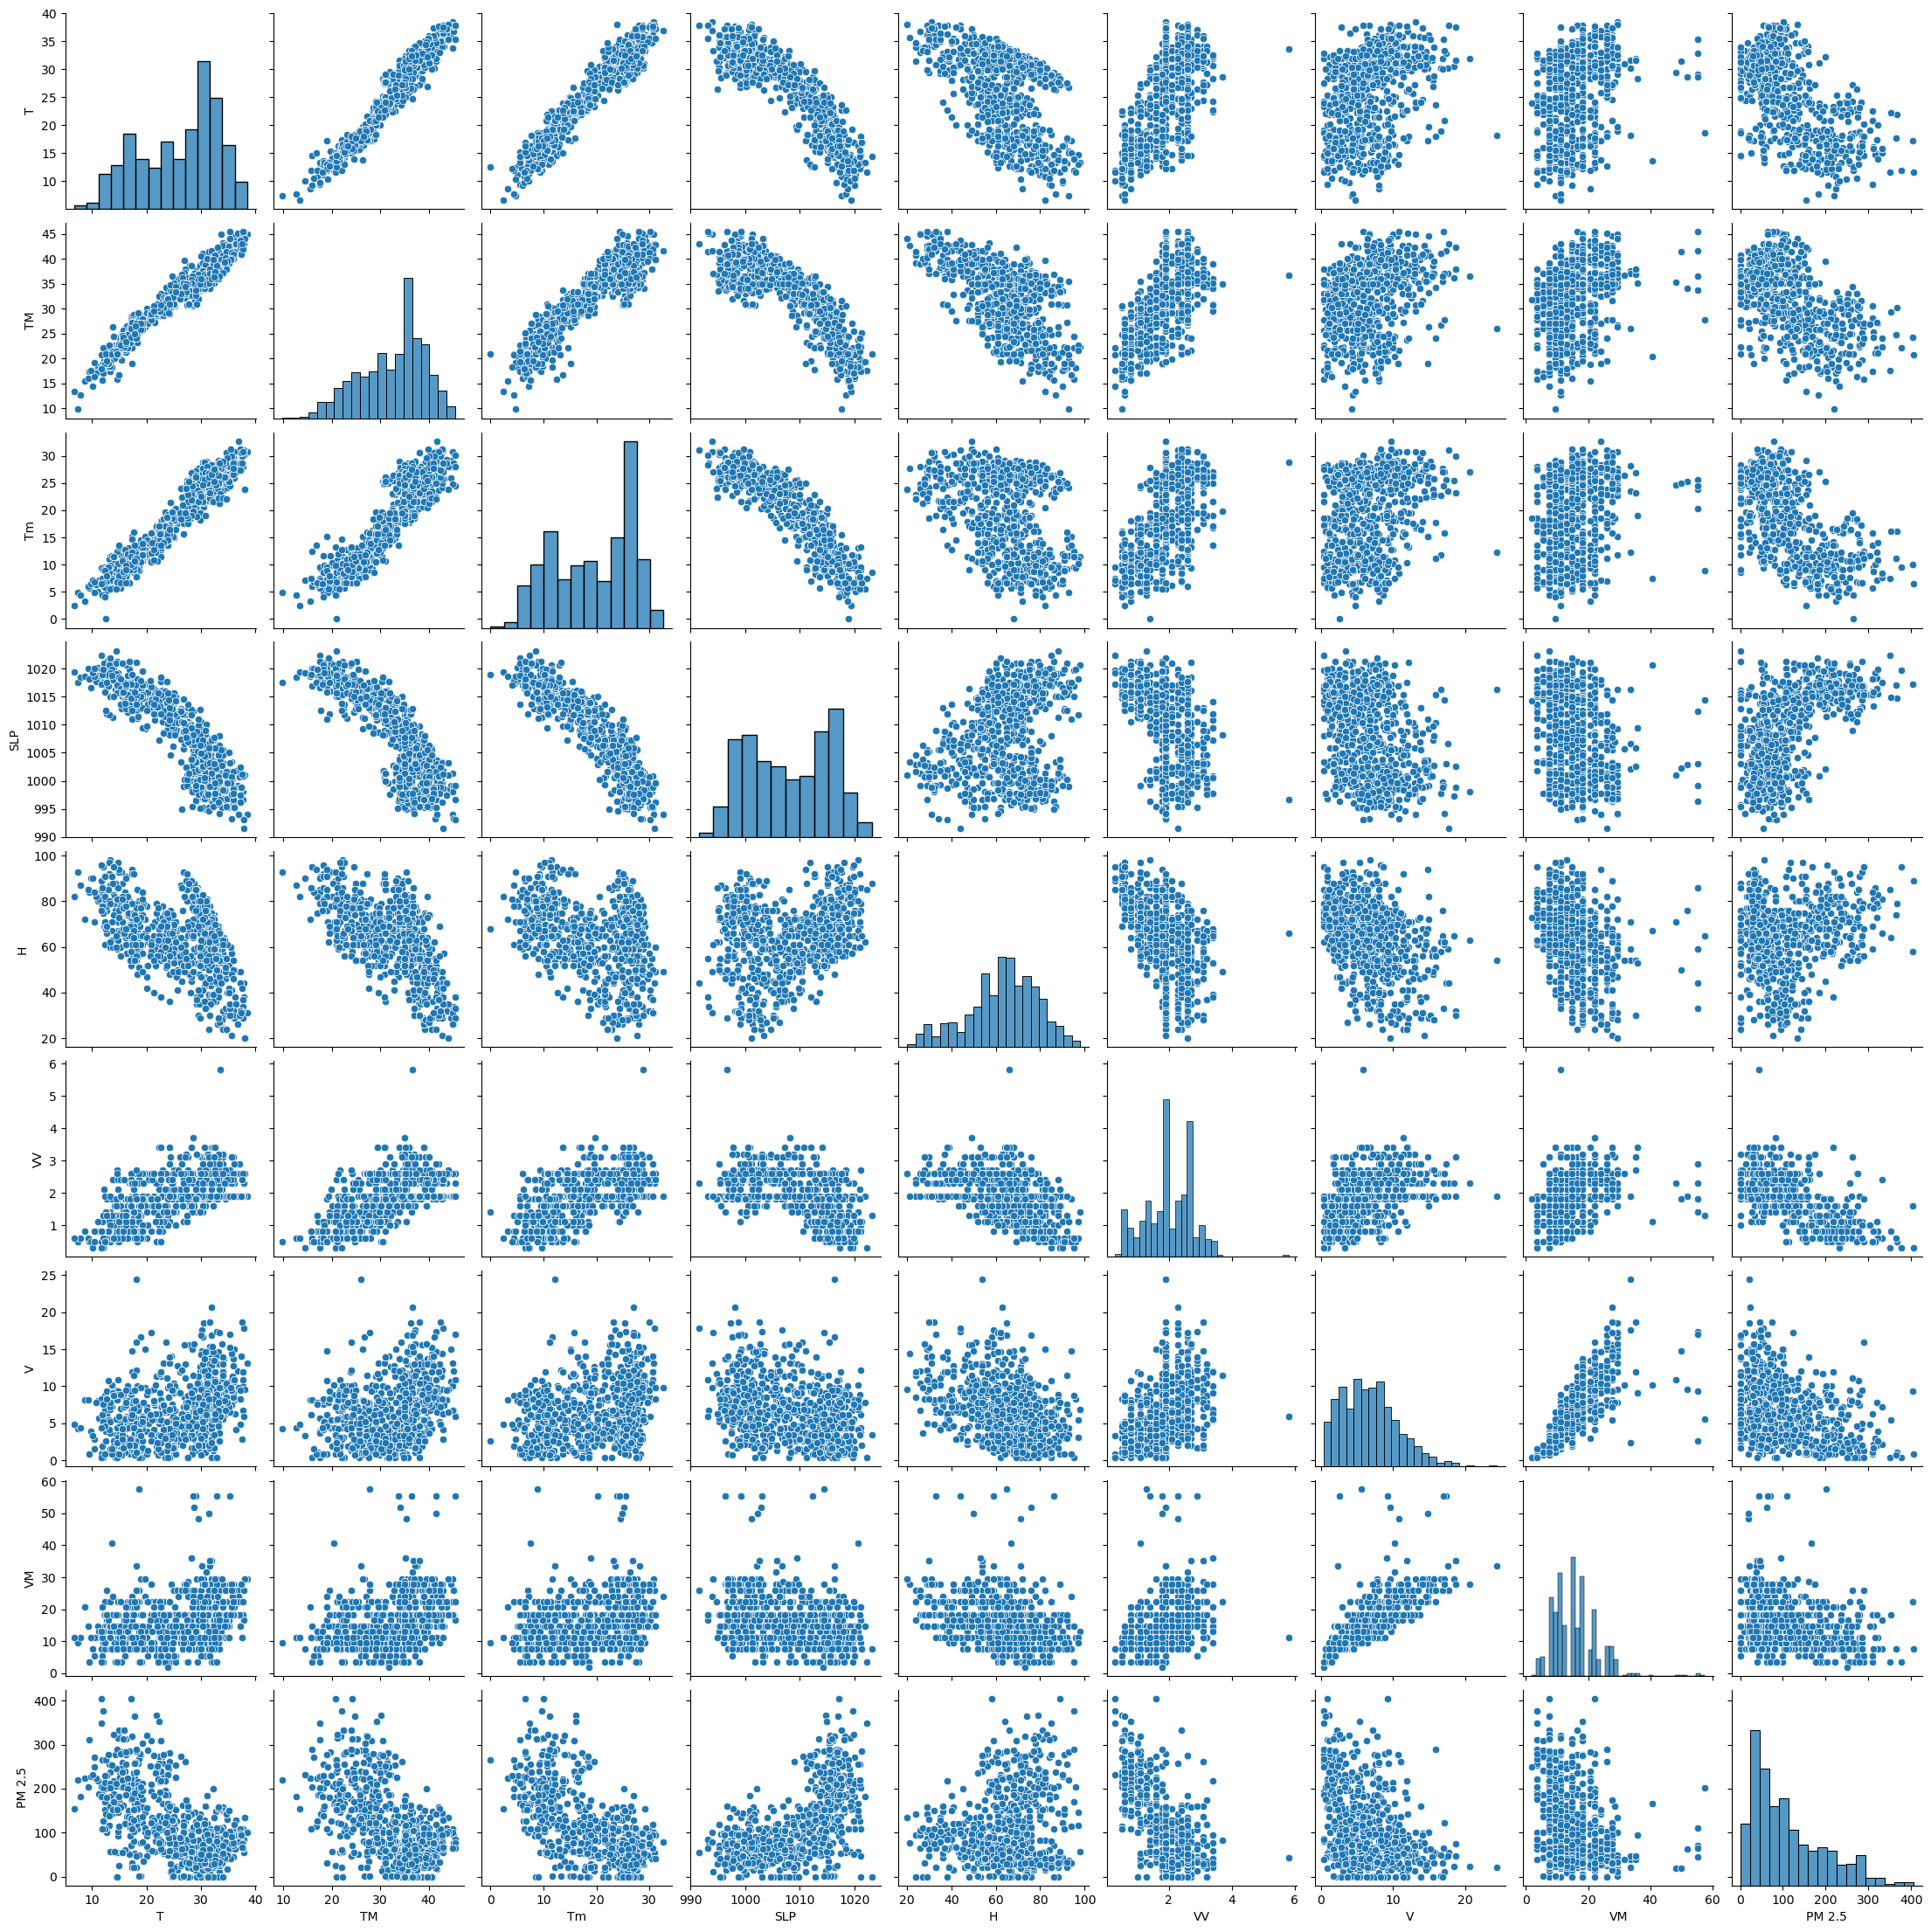

In [19]:
sns.pairplot(df)

#### Plotting a Heat Map

In [34]:
relation= df.corr()
relation

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.967536,0.953719,-0.881409,-0.509299,0.640792,0.301994,0.287738,-0.631462
TM,0.967536,1.000000,0.892031,-0.822958,-0.586681,0.606945,0.292949,0.297011,-0.568409
Tm,0.953719,0.892031,1.000000,-0.917518,-0.287357,0.577240,0.296225,0.266782,-0.673824
SLP,-0.881409,-0.822958,-0.917518,1.000000,0.240256,-0.517915,-0.329838,-0.310704,0.623187
H,-0.509299,-0.586681,-0.287357,0.240256,1.000000,-0.465374,-0.380575,-0.362177,0.138005
VV,0.640792,0.606945,0.577240,-0.517915,-0.465374,1.000000,0.376873,0.342442,-0.573941
V,0.301994,0.292949,0.296225,-0.329838,-0.380575,0.376873,1.000000,0.775655,-0.268530
VM,0.287738,0.297011,0.266782,-0.310704,-0.362177,0.342442,0.775655,1.000000,-0.215854
PM 2.5,-0.631462,-0.568409,-0.673824,0.623187,0.138005,-0.573941,-0.268530,-0.215854,1.000000


In [35]:
top_corr_features=relation.index
top_corr_features

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')

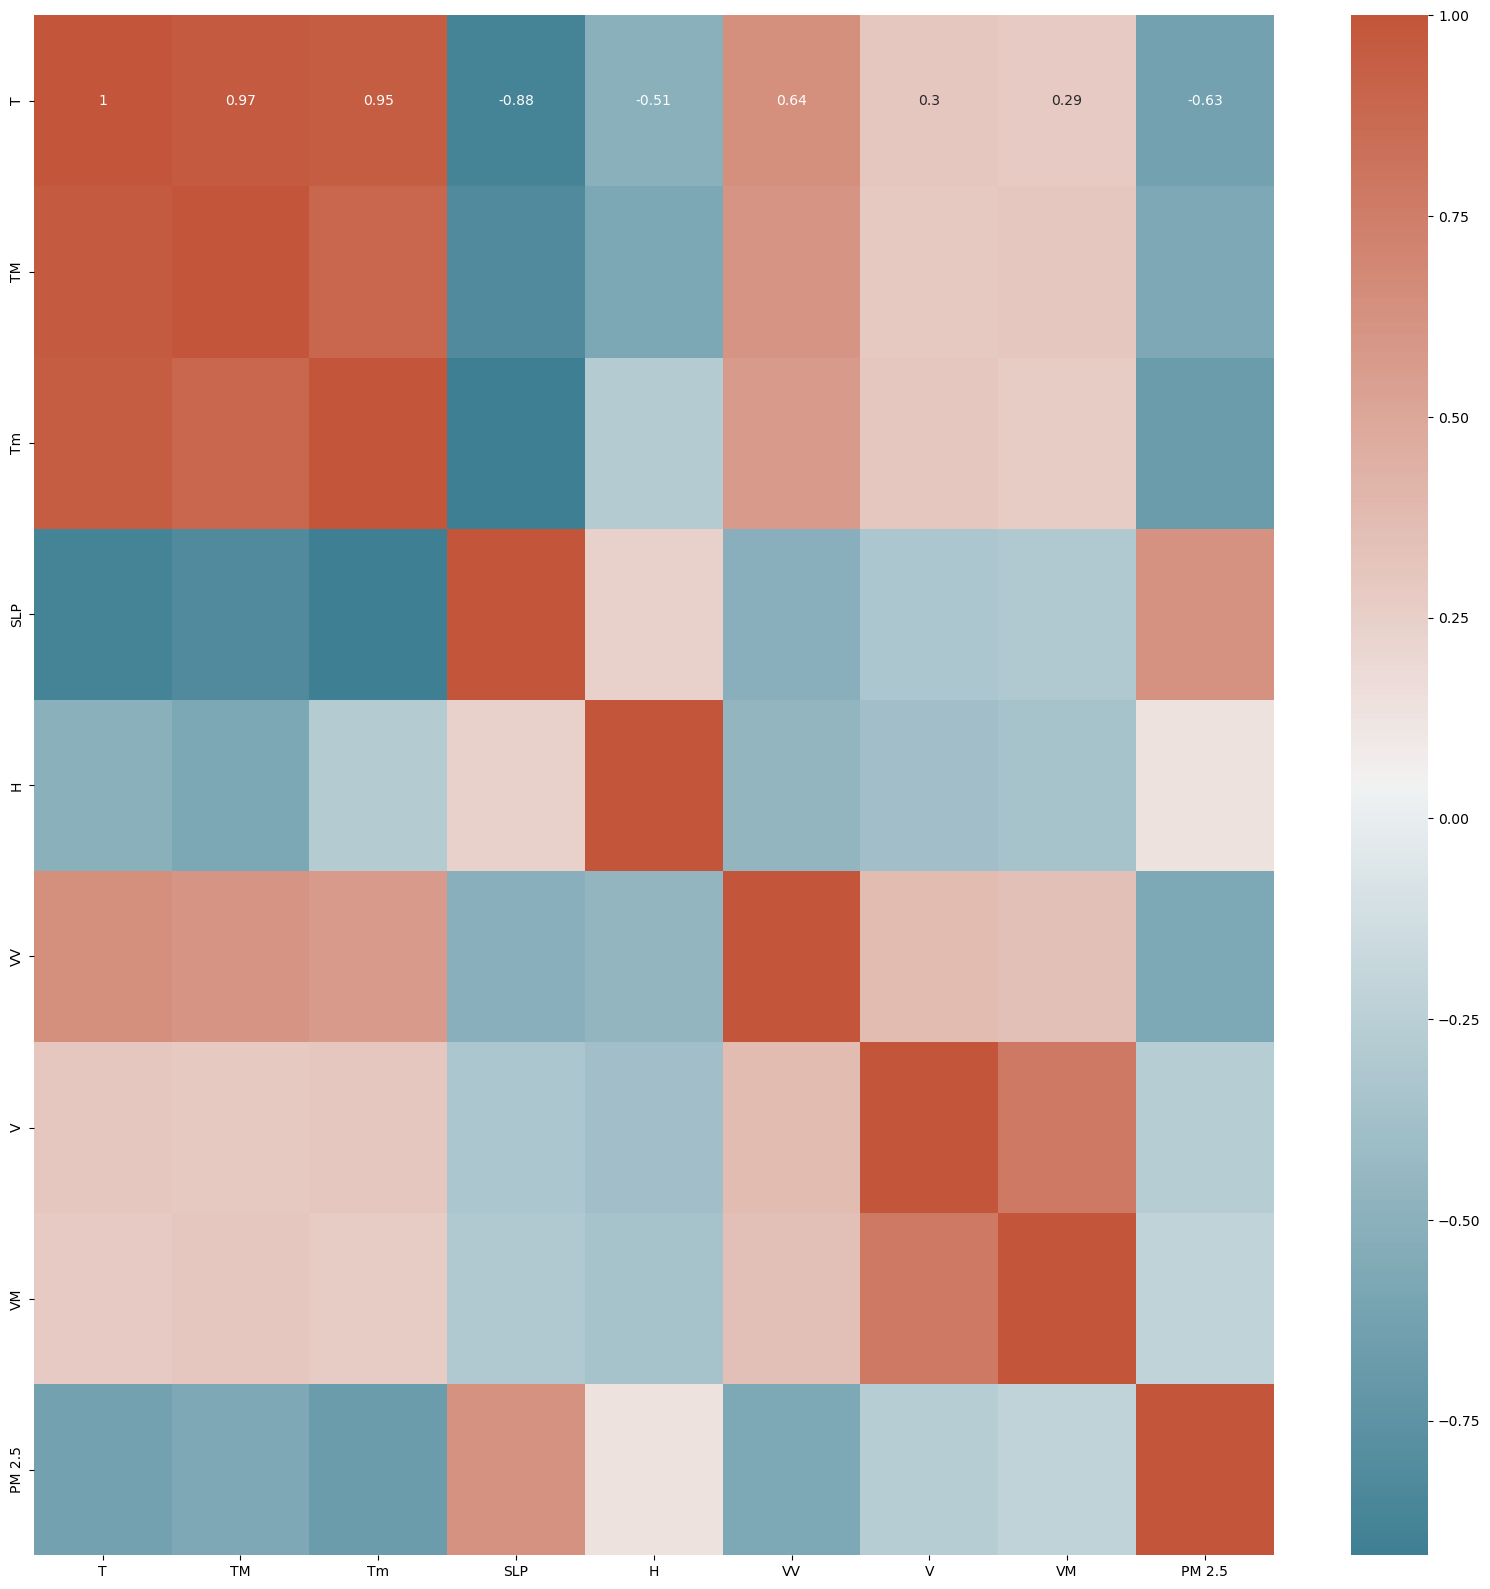

In [31]:
plt.figure(figsize=(20, 20))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(df[top_corr_features].corr(), annot=True, cmap=cmap)
plt.show()

### Plotting Q-Q Plot

In [26]:
import scipy.stats as stat
import pylab

In [27]:
def plot_curve(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.title(feature)
    plt.show()

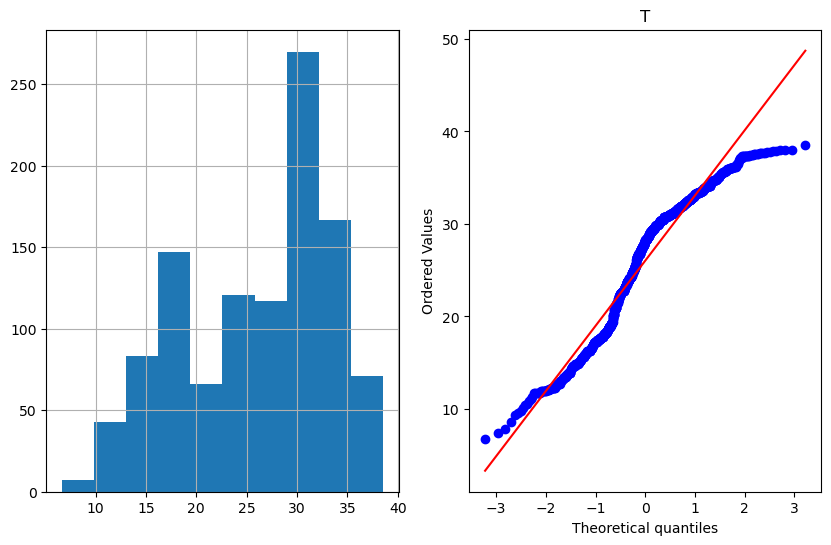

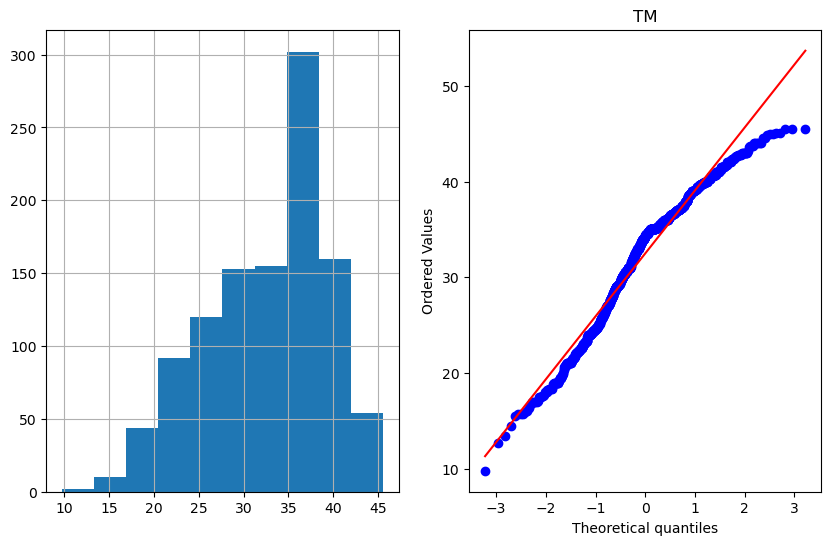

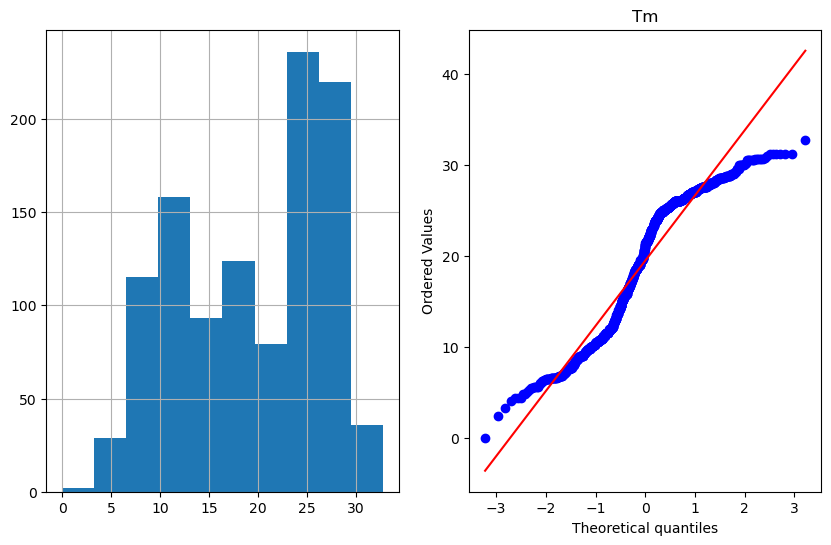

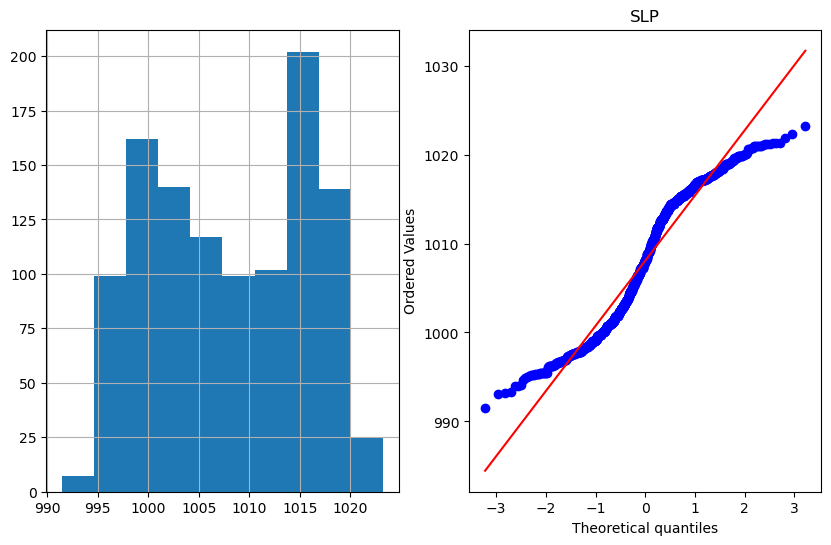

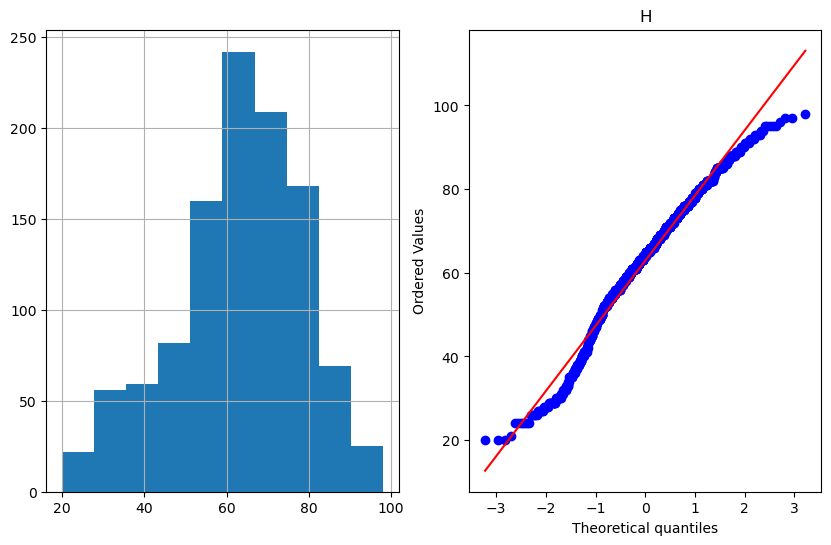

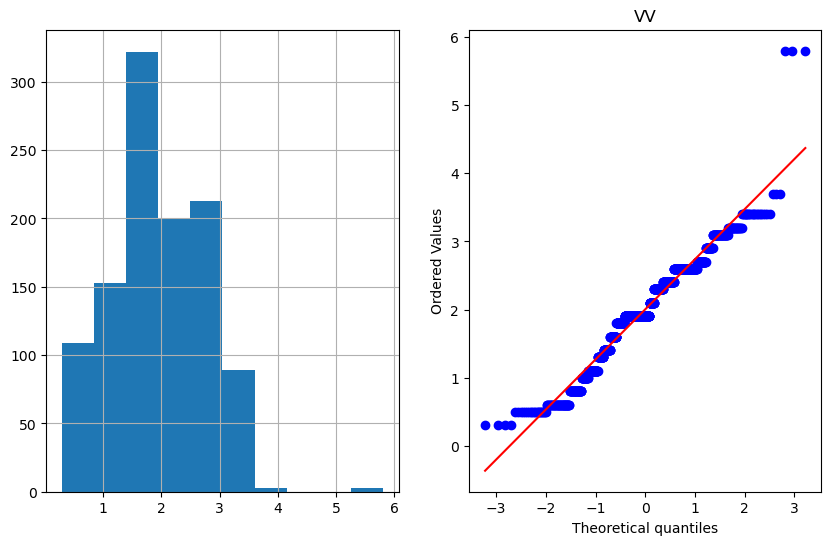

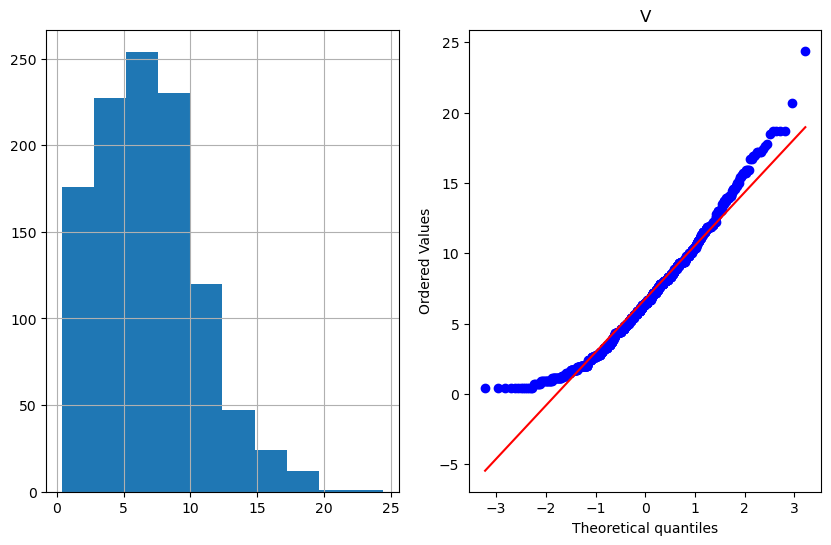

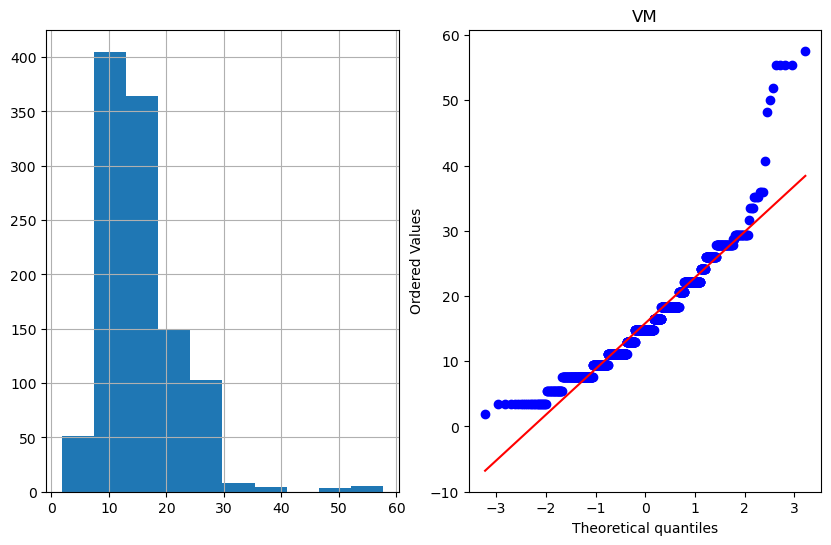

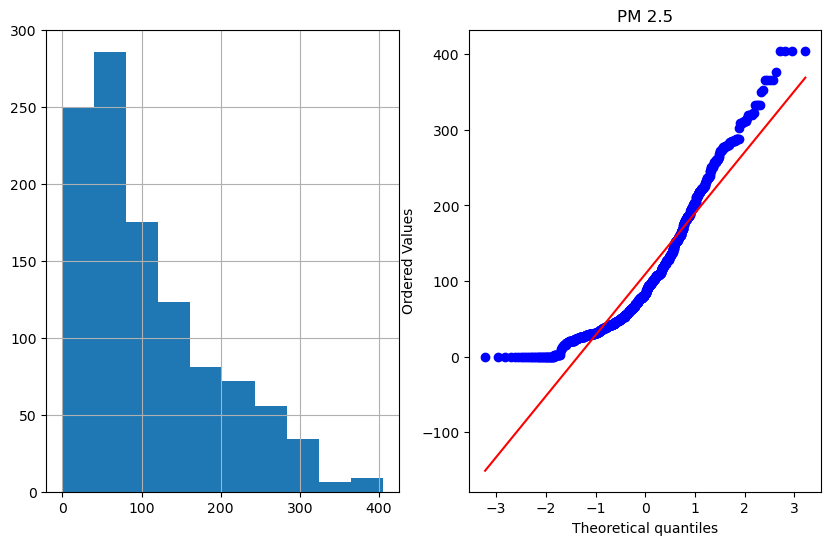

In [28]:
for i in col:
    plot_curve(df,i)

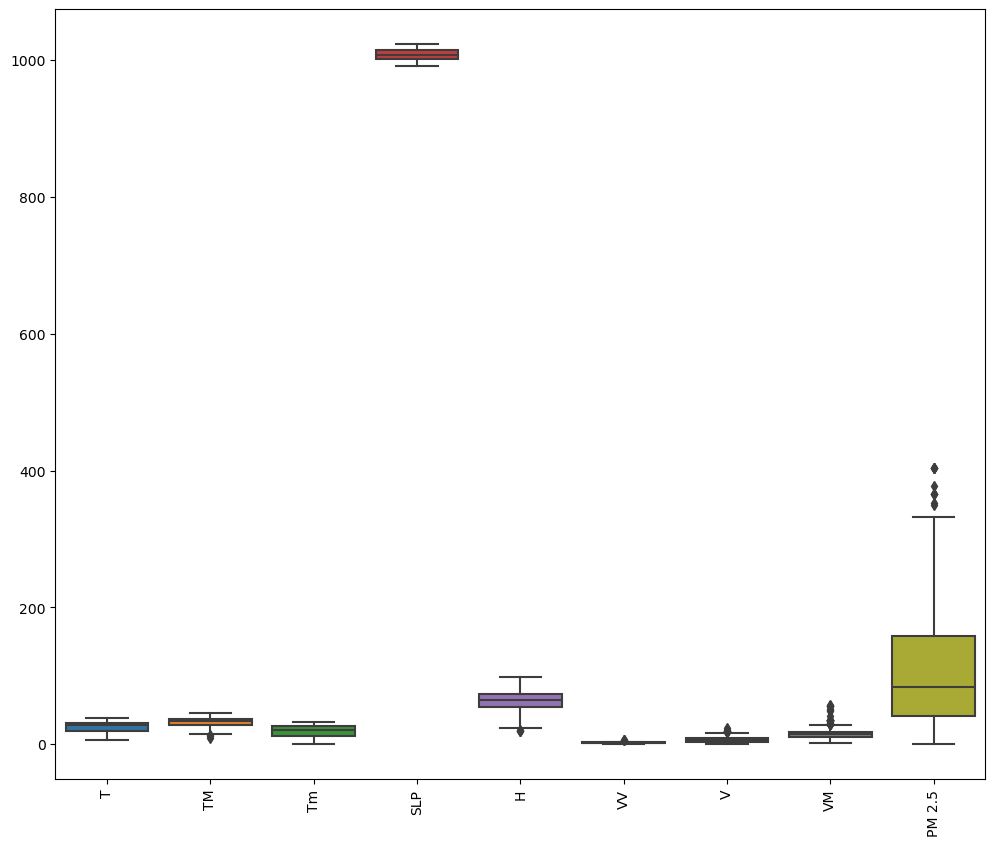

In [40]:
plt.figure(figsize=(12, 10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

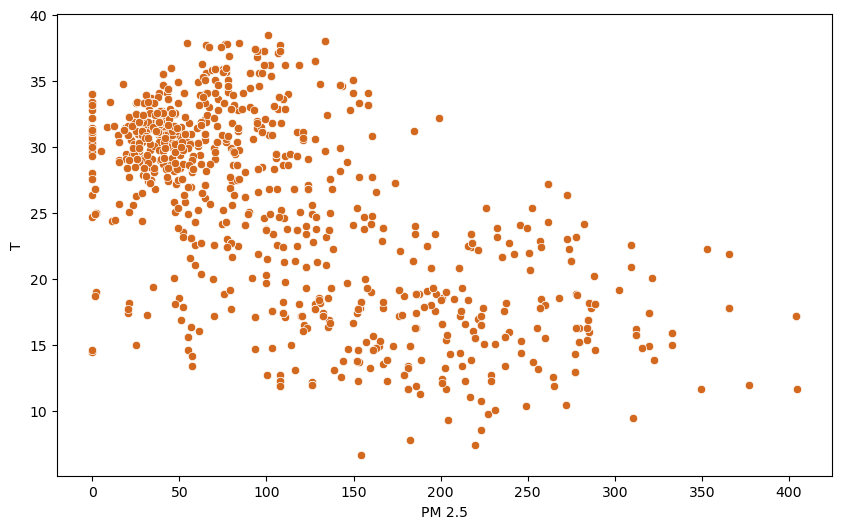

In [43]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PM 2.5', y='T', data=df, c="chocolate")
plt.show()

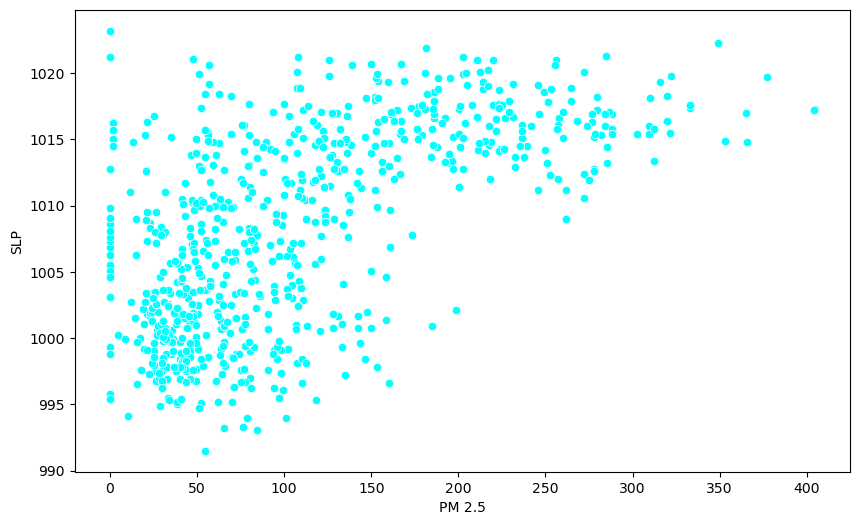

In [44]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PM 2.5', y='SLP', data=df, c="aqua")
plt.show()

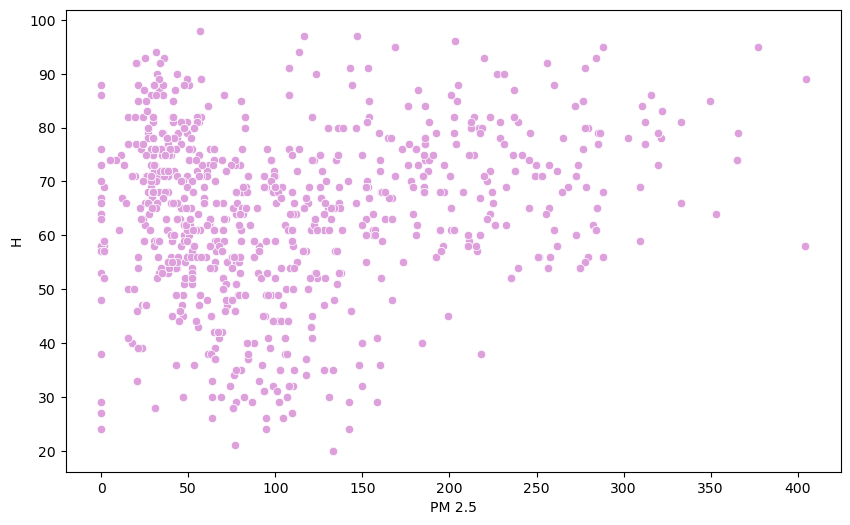

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PM 2.5', y='H', data=df, c="#DDA0DD")
plt.show()

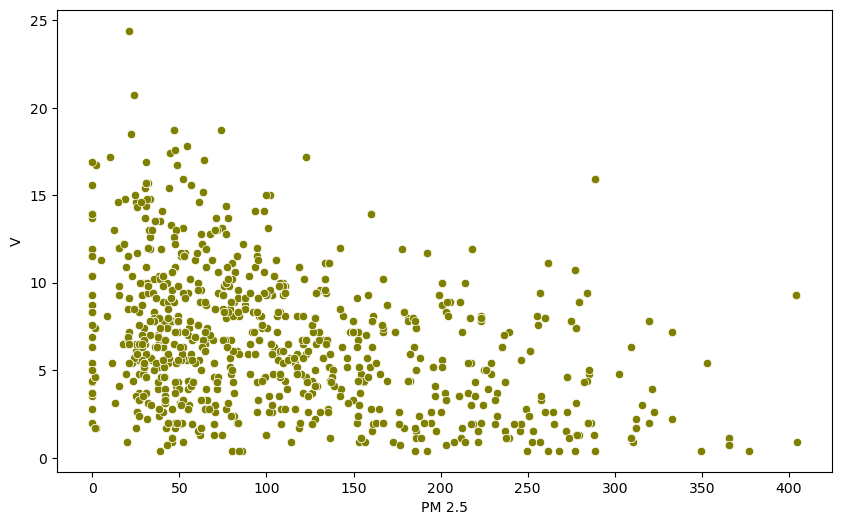

In [47]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PM 2.5', y='V', data=df, c="olive")
plt.show()

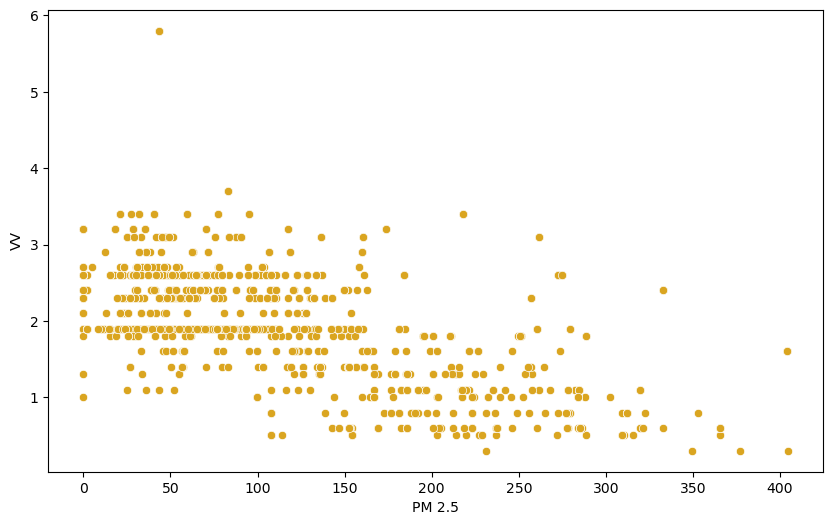

In [49]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PM 2.5', y='VV', data=df, c="goldenrod")
plt.show()

### Dividing into independent and dependent features

In [50]:
X=df.iloc[:,:-1] ## independent features
y=df.iloc[:,-1] ## dependent features

In [52]:
X.head()

,T,TM,Tm,SLP,H,VV,V,VM
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2


In [53]:
y.head()

0    219.720833
1    182.187500
2    154.037500
3    223.208333
4    200.645833
Name: PM 2.5, dtype: float64

### Feature Importance

In [55]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [56]:
print(model.feature_importances_)

[0.16503452 0.09702737 0.2148151  0.14592357 0.08813808 0.19540948
 0.05070588 0.04294599]


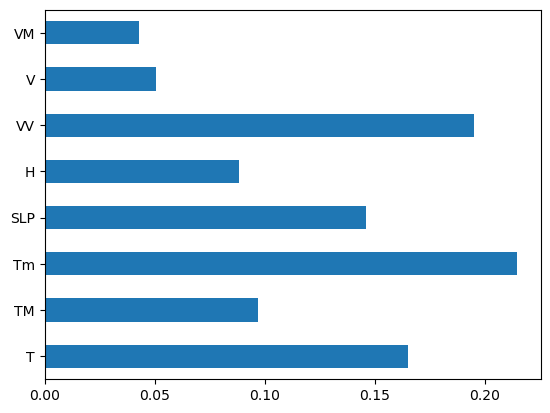

In [58]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.plot(kind='barh')
plt.show()

### Feature Engineering

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
scale= StandardScaler()

In [61]:
X= scale.fit_transform(X)

### Train Test Split

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Model Building and Prediction

### Linear Regression Model

In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [65]:
regressor.coef_

array([-19.4518069 ,   3.08146824, -28.7481916 ,  -0.33800614,
       -19.01139337, -29.98355782,  -9.73855923,   4.10277353])

In [66]:
regressor.intercept_

107.68380636733778

In [67]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.551516808175875


In [104]:
print("Coefficient of determination R^2 <-- on test set: {}".format(regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on test set: 0.48525331308567876


In [70]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)

In [71]:
score.mean()

0.4710569304807393

In [72]:
prediction=regressor.predict(X_test)

<Axes: xlabel='PM 2.5', ylabel='Density'>

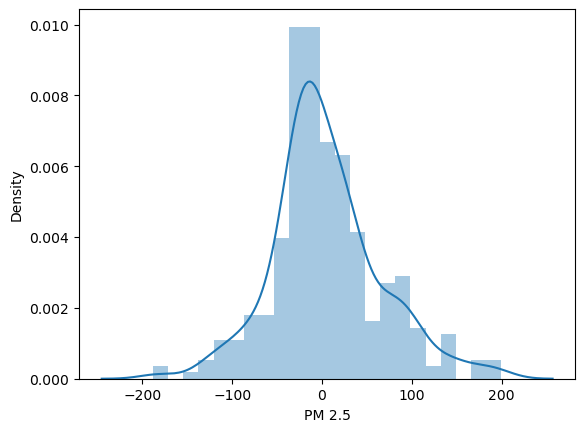

In [73]:
sns.distplot(y_test-prediction)

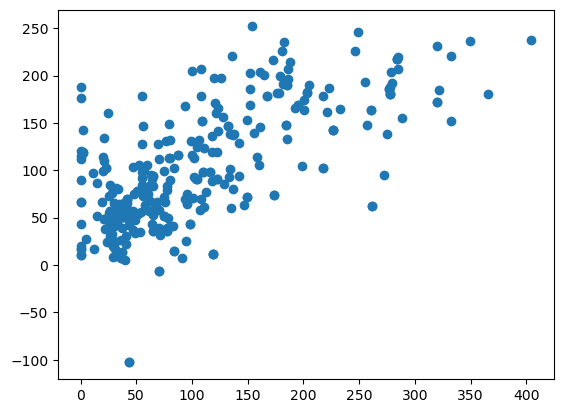

In [74]:
plt.scatter(y_test,prediction)

In [75]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))


MAE: 44.83624126628639
MSE: 3687.5430309324192
RMSE: 60.725143317512384


In [76]:
from sklearn.metrics import r2_score
print("r2_score is",r2_score(y_test, prediction))

r2_score is 0.48525331308567876


### XG Boost Regression Model

In [96]:
from xgboost import XGBRegressor

In [97]:
xg= XGBRegressor()

#### Let us use Randomised Search CV with XG Boost regressor to find the best parameter

In [98]:
from sklearn.model_selection import RandomizedSearchCV

### First we will define various parameters and their values used in XGB Regressor

In [99]:
# No.of Estimators
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)
# Different learning rate parameters
learning_rate = ['0.05','0.1', '0.2','0.3','0.5','0.6']
print(learning_rate)
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
print(max_depth)
#Subssample parameter values
subsample=[0.7,0.6,0.8]
print(subsample)
# Minimum child weight parameters
min_child_weight=[3,4,5,6,7]
print(min_child_weight)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]
['0.05', '0.1', '0.2', '0.3', '0.5', '0.6']
[5, 10, 15, 20, 25, 30]
[0.7, 0.6, 0.8]
[3, 4, 5, 6, 7]


#### Storing all these params in a dict

In [100]:
param= {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'subsample': subsample,
               'min_child_weight': min_child_weight}
print(param)


{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'learning_rate': ['0.05', '0.1', '0.2', '0.3', '0.5', '0.6'], 'max_depth': [5, 10, 15, 20, 25, 30], 'subsample': [0.7, 0.6, 0.8], 'min_child_weight': [3, 4, 5, 6, 7]}


### Running our Randomised Search CV for best params

In [101]:
xgb_random= RandomizedSearchCV(estimator = xg, param_distributions = param,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [102]:
xgb_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   5.6s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=  10.2s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   6.0s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   9.0s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   8.1s
[CV] END learning_rate=0.3, max_depth=20, min_child_weight=6, n_estimators=600, subsample=0.7; total time=   9.2s
[CV] END learning_rate=0.3, max_depth=20, min_child_weight=6, n_estimators=600, subsample=0.7; total time=  10.2s
[CV] END learning_rate=0.3, max_depth=20, min_child_weight=6, n_estimators=600, subsample=0.7; total time=   8.8s
[CV] END learning_ra

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=100, n_jobs=1,
                   param_distributions={'learning_rate': ['0.05', '0.1', '0.2',
                                                          '0.3', '0.5', '0.6'],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'min_child_weight': [3, 4, 5, 6, 7],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200],
                                        'subsample': [0.7, 0.6, 0.8]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [103]:
xgb_random.best_params_

{'subsample': 0.7,
 'n_estimators': 900,
 'min_child_weight': 5,
 'max_depth': 5,
 'learning_rate': '0.05'}

### Fitting our Model with best  Params

In [105]:
xgr = XGBRegressor(subsample= 0.7,
 n_estimators= 900,
 min_child_weight= 5,
 max_depth= 5,
 learning_rate= 0.05)

In [106]:
xgr.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=900, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### Predictions and Accuracy

In [107]:
predictions=xgr.predict(X_test)

In [110]:
predictions

array([104.32254   , 125.76662   , 278.8145    , 110.07379   ,
        38.630417  , 143.43668   , 209.99968   , 186.04881   ,
        35.7038    , 223.02858   ,  89.45139   , 173.43181   ,
        17.745016  ,  65.90606   , 115.01797   , 173.43181   ,
       228.41252   , 262.8383    ,  77.28353   , 150.94116   ,
         0.8496026 ,  26.486145  ,  42.69102   , 107.23322   ,
       126.28358   ,  76.891975  ,  37.7216    , 146.5522    ,
         3.4270623 ,  76.12018   ,  87.14222   , 111.60359   ,
       103.042     ,  16.79236   ,  43.606697  ,  95.36317   ,
       284.96887   ,  85.309906  ,  30.725044  , 143.21385   ,
        58.059353  ,  44.86277   , 181.16125   , 133.81674   ,
       174.65941   , 115.01797   ,  48.67034   ,  89.45139   ,
       118.6389    ,  93.39234   , 275.64664   ,  95.71397   ,
       328.5094    ,  72.83684   ,  44.855156  ,  44.855156  ,
        55.89566   , 120.87029   ,  28.113691  ,  34.792137  ,
        55.275364  , 119.42361   ,  36.4764    , 189.48

<Axes: xlabel='PM 2.5', ylabel='Density'>

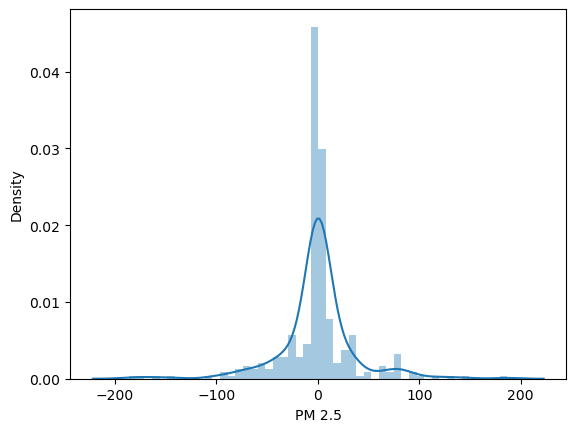

In [109]:
sns.distplot(y_test-predictions)

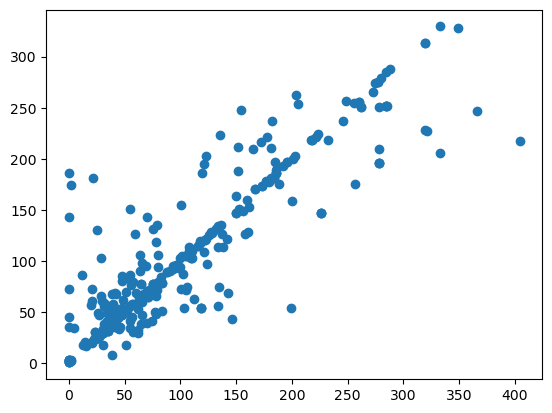

In [111]:
plt.scatter(y_test,predictions)

In [112]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 20.431033037930003
MSE: 1455.269252079781
RMSE: 38.14799145538046


In [113]:
from sklearn.metrics import r2_score
print("r2_score is",r2_score(y_test, predictions))

r2_score is 0.7968579566956441


### Random Forest Regression Model

In [80]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor()

#### Using Randomized Search CV for best params

In [81]:
from sklearn.model_selection import RandomizedSearchCV

#### Defining params

In [82]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


In [83]:

params = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(params)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [84]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = params,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [85]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   1.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   1.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   1.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   1.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   1.3s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.9s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   2.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_es

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [86]:
rf_random.best_params_

{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 15}

### Fitting our Model

In [87]:
rf1= RandomForestRegressor(n_estimators= 500,
 min_samples_split=  2,
min_samples_leaf=1,
 max_features= 'sqrt',
 max_depth=15)

In [88]:
rf1.fit(X_train,y_train)

RandomForestRegressor(max_depth=15, max_features='sqrt', n_estimators=500)

In [89]:
ypred= rf1.predict(X_test)

In [91]:
ypred

array([ 94.03909492, 134.20367773, 275.25734449, 103.35665962,
        39.91291289, 149.65702168, 212.65755584, 173.95733176,
        46.09262634, 195.83691715,  93.70404694, 156.29382031,
        32.85633336,  79.92844151, 102.79706512, 156.29382031,
       232.29949974, 205.03269745,  73.11175522, 150.15244969,
        11.42402829,  39.6437756 ,  39.81990109, 108.14283581,
       129.73187333,  75.34453038,  45.37334746, 120.76001498,
        12.36186269,  80.43869155,  82.34029213, 129.9162046 ,
       100.63817639,  21.84204919,  47.33426836,  96.85609537,
       271.40720708,  90.76199874,  44.80455487, 180.33475515,
        55.1830233 ,  52.37158888, 169.62235972, 129.018625  ,
       177.98959167, 102.79706512,  50.05611354,  93.70404694,
       114.70656568,  91.492967  , 237.63264911,  83.85303272,
       296.883375  ,  84.56562685,  44.76413972,  44.76413972,
        71.01042817, 110.55867982,  47.21332612,  40.04324655,
        47.49195399, 118.70131116,  34.61872721, 232.93

<Axes: xlabel='PM 2.5', ylabel='Density'>

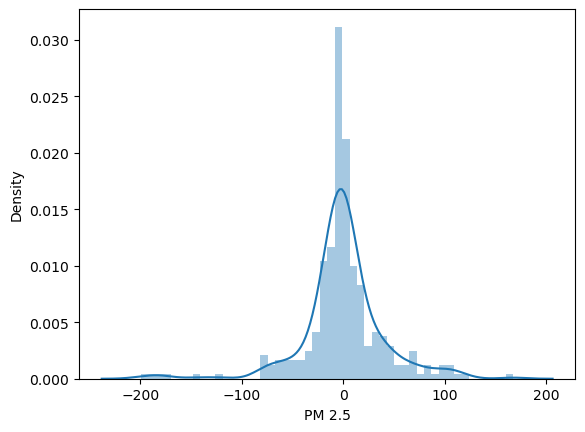

In [90]:
sns.distplot(y_test-ypred)

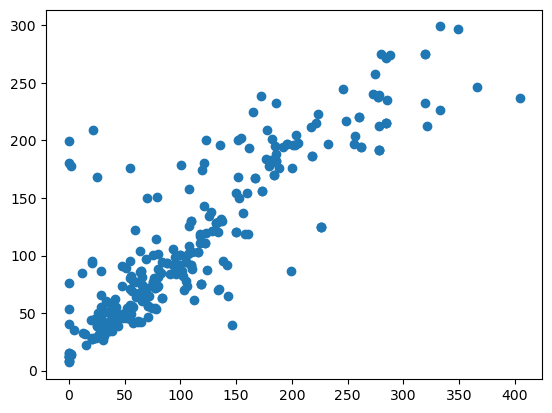

In [92]:
plt.scatter(y_test,ypred)

In [93]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, ypred))
print('MSE:', metrics.mean_squared_error(y_test, ypred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ypred)))

MAE: 24.72195119381178
MSE: 1673.6351358085167
RMSE: 40.91008599121391


In [94]:
from sklearn.metrics import r2_score
print("r2_score is",r2_score(y_test, ypred))

r2_score is 0.7663761116726552


### Importing Pickle for deployment 

In [114]:
import pickle

#### We will use our best performing model i.e. XGB Regressor

In [115]:
# open a file, where you ant to store the data
file = open('aqi_XGBreg_model.pkl', 'wb')

# dump information to that file
pickle.dump(xgr, file)

In [116]:
xgr

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=900, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)